<a href="https://colab.research.google.com/github/RedLeader962/T13-Deep-Learning-Project/blob/T13PRO-155-experiment-runner/colab_experiment_runner_T1Bravo_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab `team13twin-rudder` experiment runner - RUN T1 CP/MC

### Jupyter notebook stuff

In [ ]:
# Load and turn ON IPython autoreload
#   %autoreload 0 - disables the auto-reloading. This is the default setting
#   %autoreload 1 - it will only auto-reload modules that were imported using the %aimport function (e.g %aimport my_module).
#   %autoreload 2 - auto-reload all the modules
#
#   Alternative:
#   ```
#   import importlib
#   importlib.reload(my_module)
#   ```
# source: https://switowski.com/blog/ipython-autoreload
# %load_ext autoreload
# %autoreload 2
#
# %matplotlib inline

### Clone `T13-Deep-Learning-Project` repository

#### Setup local user

In [ ]:
!git config --global user.email "luc.coupal.1@ulaval.ca"
!git config --global user.name "RedLeader962"

In [ ]:
import os
from getpass import getpass

if not os.path.exists('./codebase'):
    # user = getpass('GitHub user')
    user = 'RedLeader962'
    password = getpass('GitHub password')
    os.environ['GITHUB_AUTH'] = user + ':' + password
    # !git clone -l -s https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git cloned-repo
    !git clone -l -s --branch T13PRO-159-experimentation-branch https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git cloned-repo

    %cd cloned-repo
    !ls
else:
    print("››› T13-Deep-Learning-Project.git is already cloned")

GitHub password··········
Cloning into 'cloned-repo'...
remote: Enumerating objects: 2934, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 2934 (delta 73), reused 117 (delta 42), pack-reused 2777
Receiving objects: 100% (2934/2934), 126.10 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (2060/2060), done.
Checking out files: 100% (581/581), done.
/content/cloned-repo
Backup_trajectories_Do_Not_Delete_or_Change  images	       script
codebase				     __init__.py       tests
experiment				     README.md
experiment_runner			     requirements.txt


#### Pull repo update when needed

In [ ]:
!git pull https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git

From https://github.com/RedLeader962/T13-Deep-Learning-Project
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


#### Test `T13-Deep-Learning-Project` cloning procedure

In [ ]:
from experiment_runner.experiment_runner_utils import check_repository_pulled_to_local_drive_ok
check_repository_pulled_to_local_drive_ok()

hellooooowwwwwww RedLeader962!


------------------------------------------------------------------------------------------------------------------------

In [ ]:
## Check l'état du GPU en loop à tout les 10sec
# !watch -n10.0 nvidia-smi

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Sun May  2 23:47:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

------------------------------------------------------------------------------------------------------------------------
# `lstm` model baseline experimentation

In [ ]:
import dataclasses

import torch
import numpy as np
import random

from codebase import rudder as rd
from experiment_runner.experiment_spec import (
    ExperimentSpec,
    PpoExperimentSpec,
    RudderLstmExperimentSpec,
    PpoRudderExperimentSpec
    )

from experiment_runner.parameter_search_map import (
    PpoRudderParameterSearchMap,
    RudderLstmParameterSearchMap
    )

from experiment_runner.colab_spec_configuration import (
    colab_rudder_lstm_specs,
    colab_ppo_rudder_top_to_bottom_specs,
    T1Bravo_CP_colab_ppo_rudder_top_to_bottom_specs,
    T1Bravo_MC_colab_ppo_rudder_top_to_bottom_specs
    )
from experiment_runner.experiment_runner_utils import execute_experiment_plan, execute_parameter_search
# from script.Script_run_LSTM import main as script_rudder_lstm_main,
# from script.Script_run_ppo_with_rudder import main as script_rudder_run_ppo_with_rudder_main
from script.Script_run_ppo_with_rudder_top_to_bottom import main as script_rudder_run_ppo_with_rudder_TOP_TO_BOTTOM_main


In [ ]:
"""
Check all available field in `experiment_runner/experiment_spec.py`
"""

# colab_specs = RudderLstmParameterSearchMap(
#     env_name="CartPole-v1",
#     env_batch_size=lambda: random.choice([4, 6, 8, 10]),
#     model_hidden_size=lambda: random.choice([10, 15, 20, 25, 30, 40, 60]),
#     env_n_trajectories=lambda: random.choice([3000, 4000, 5000, ]),
#     env_perct_optimal=lambda: random.choice([0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.7, ]),
#     env_rew_factor=lambda: random.choice([1.0, 1.0, 0.1, 0.01, ]),
#     n_epoches=lambda: random.choice([20, 40, 60, 80, 100, 140, 200, 300, 400, 600]),
#     optimizer_weight_decay=lambda: random.choice([1e-1, 1e-2, 1e-3]),
#     optimizer_lr=lambda: random.choice([1e-1, 1e-2, 1e-3]),
#     show_plot=True,
#     print_to_consol=False,
#     seed=42,
#     )


'\nCheck all available field in `experiment_runner/experiment_spec.py`\n'

In [ ]:
# exp_spec = colab_specs



---
---
# Exp T1Bravo_MC | MontainCar

#### T1Bravo_MC | Run partie 1.a



:::: (1/10) Start experiment 1 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-1
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-1
                     spec_idx : 1
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

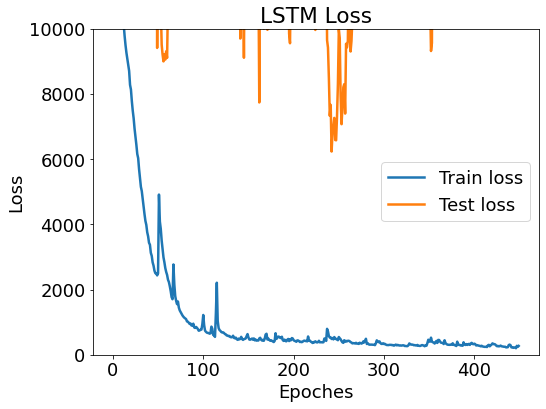

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-1
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-1/lstm_30_0.001_4000_0.7.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


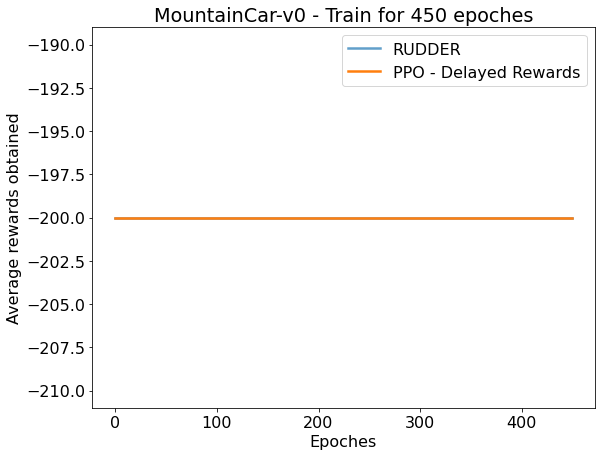



:::: (2/10) Start experiment 2 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-2
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-2
                     spec_idx : 2
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 20
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

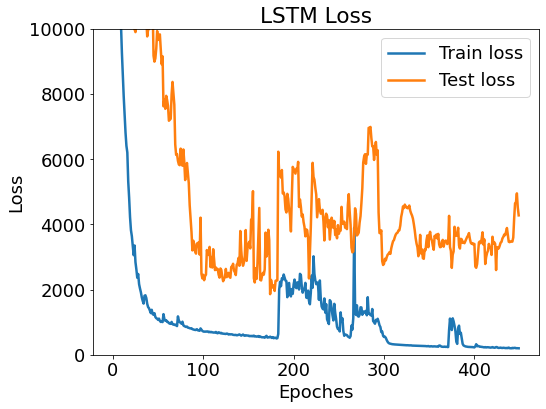

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-2
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-2/lstm_20_0.001_4000_0.3.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


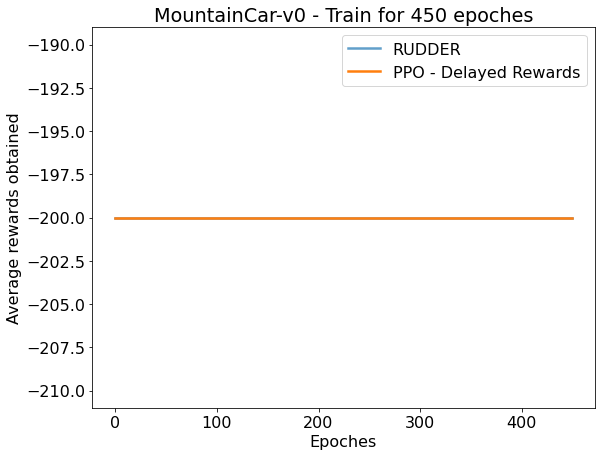



:::: (3/10) Start experiment 3 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-3
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-3
                     spec_idx : 3
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 35
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

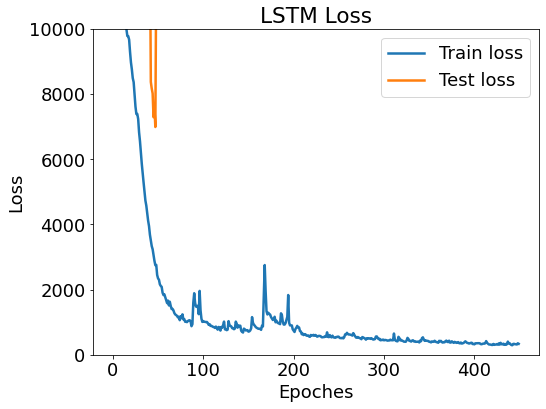

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-3
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-3/lstm_35_0.001_4000_0.6.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


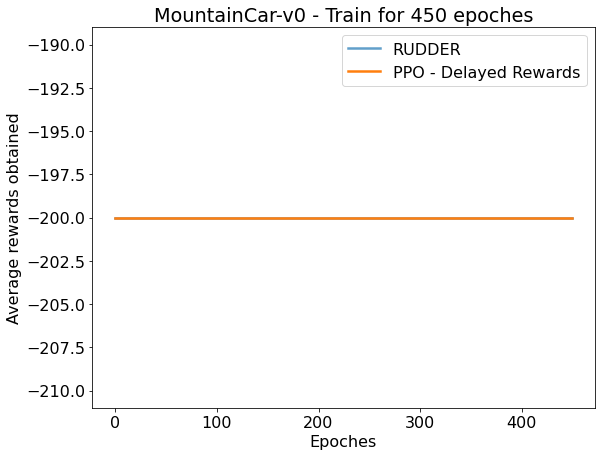



:::: (4/10) Start experiment 4 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-4
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-4
                     spec_idx : 4
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 20
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

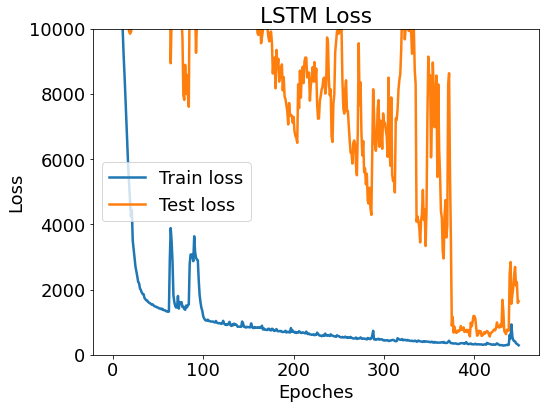

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-4
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-4/lstm_20_0.001_4000_0.1.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


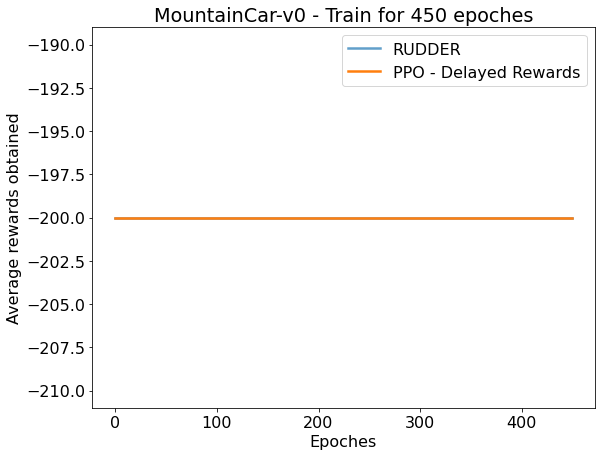



:::: (5/10) Start experiment 5 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-5
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-5
                     spec_idx : 5
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

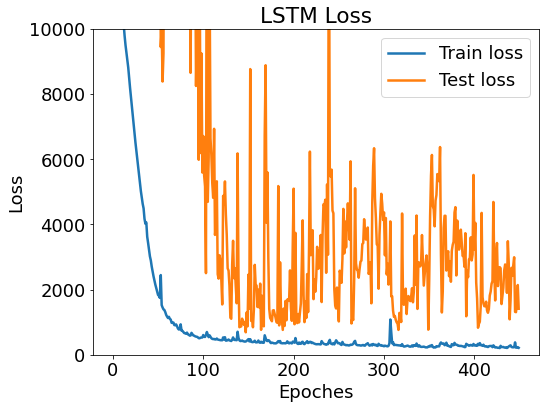

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-5
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-5/lstm_30_0.001_4000_0.7.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


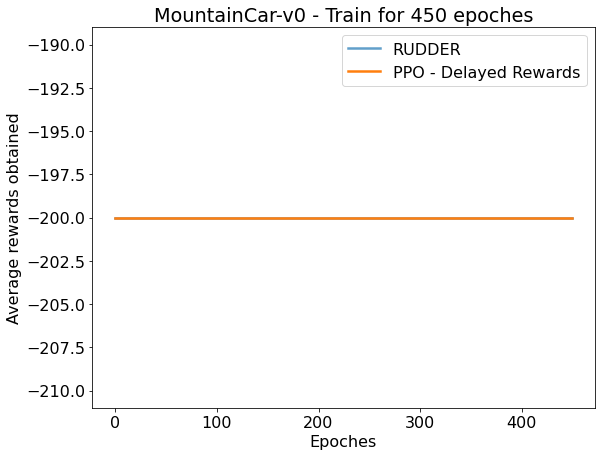



:::: (6/10) Start experiment 6 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-6
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-6
                     spec_idx : 6
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

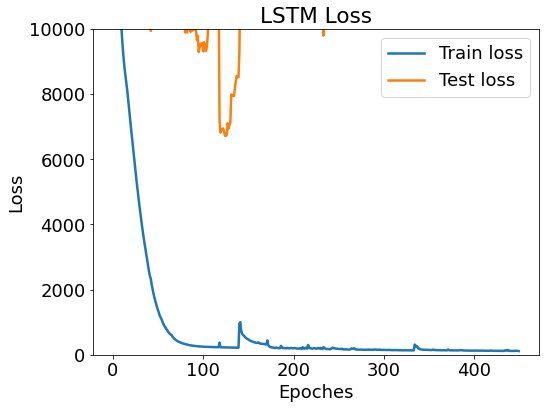

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-6
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-6/lstm_30_0.001_4000_0.9.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


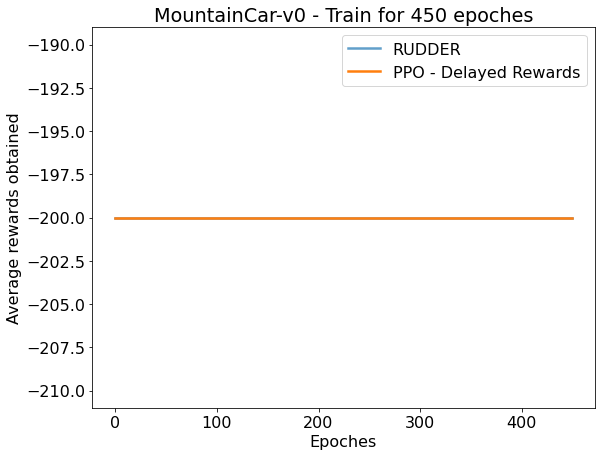



:::: (7/10) Start experiment 7 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-7
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-7
                     spec_idx : 7
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 20
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

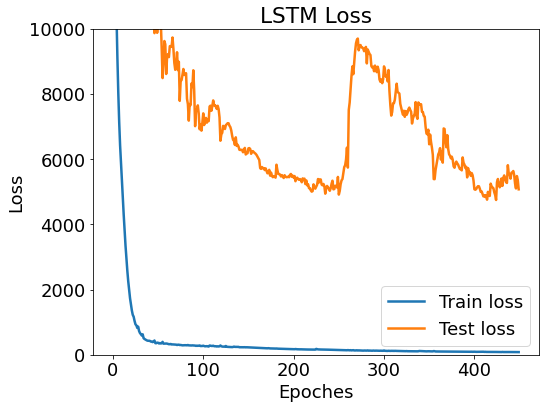

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-7
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-7/lstm_20_0.001_4000_0.9.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


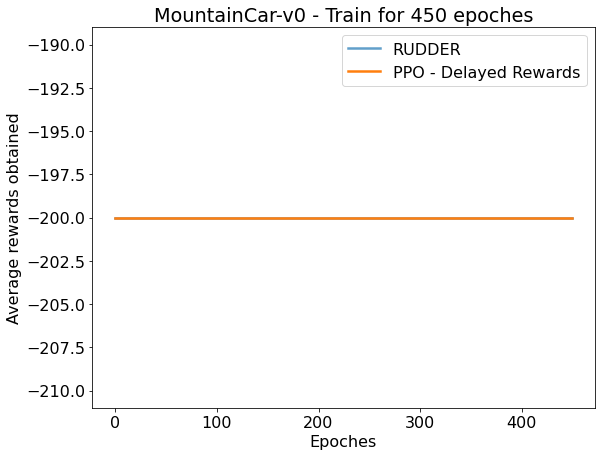



:::: (8/10) Start experiment 8 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-8
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-8
                     spec_idx : 8
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 20
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

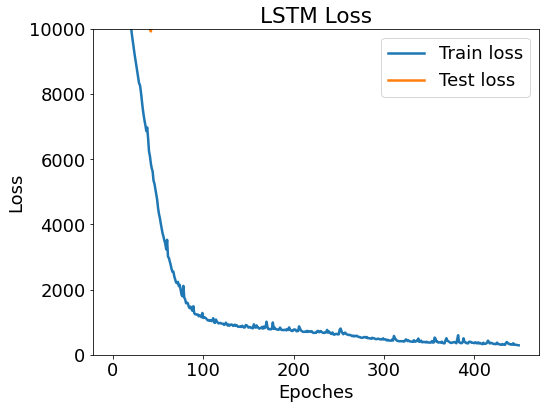

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-8
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-8/lstm_20_0.001_4000_0.6.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


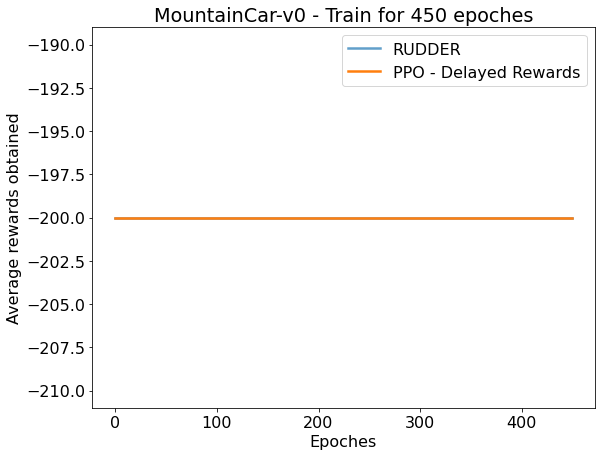



:::: (9/10) Start experiment 9 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-9
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-9
                     spec_idx : 9
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 40
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy 

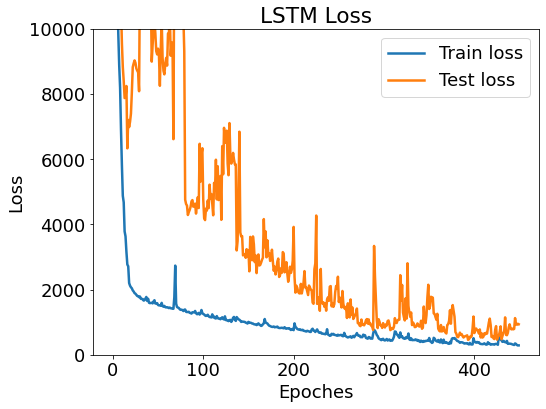

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-9
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-9/lstm_40_0.001_4000_0.1.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


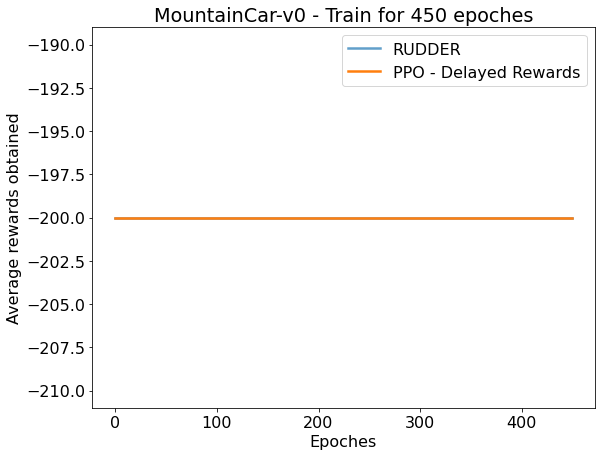



:::: (10/10) Start experiment 10 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-10
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-10
                     spec_idx : 10
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 20
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_poli

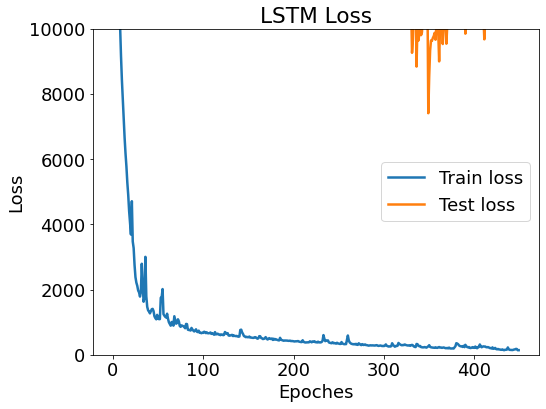

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-10
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-10/lstm_20_0.001_4000_0.4.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


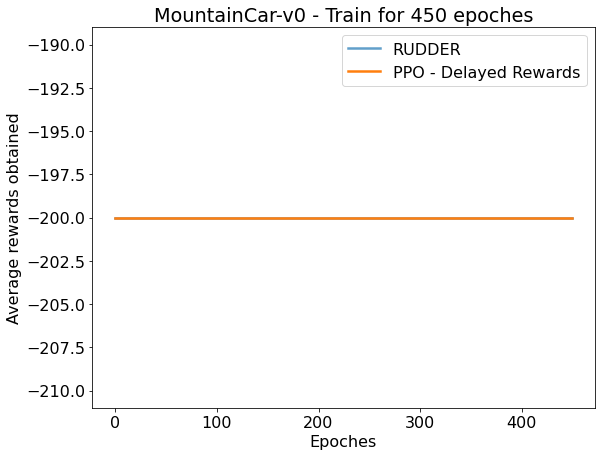


 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 10 experimentation DONE ::::
 ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 




In [ ]:

result = execute_parameter_search(T1Bravo_MC_colab_ppo_rudder_top_to_bottom_specs,
                                  script_fct=script_rudder_run_ppo_with_rudder_TOP_TO_BOTTOM_main,
                                  exp_size=10, start_count_at=1)

In [ ]:
!git add experiment/run/CartPole-v1/\*/\*
!git add experiment/run/CartPole-v1/\*/lstm_\*.pt
!git add experiment/run/CartPole-v1/\*/\*.jpg
!git add experiment/run/MountainCar-v0/\*
!git add experiment/run/MountainCar-v0/\*/lstm_\*.pt
!git add experiment/run/MountainCar-v0/\*/\*.jpg

!git commit -am "Colab run RedLeader962 T1Bravo run"
!git push https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git --all

fatal: pathspec 'experiment/run/CartPole-v1/*/*' did not match any files
fatal: pathspec 'experiment/run/CartPole-v1/*/lstm_*.pt' did not match any files
fatal: pathspec 'experiment/run/CartPole-v1/*/*.jpg' did not match any files
[T13PRO-159-experimentation-branch 1da5d58] Colab run RedLeader962 T1Bravo run
 30 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-1/MountainCar-v0_PPO_RUDDER.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-1/lstm_30_0.001_4000_0.7.pt
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-1/lstm_fig_loss_30_0.001_4000_0.7.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-23h47--2-5-2021--259587696876078243444234025608698134530/run-10/MountainCar-v0_PPO_RUDDER.jpg
 create mode

#### T1Bravo_MC | Run partie 1.b




:::: (11/10) Start experiment 21 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-11
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-11
                     spec_idx : 11
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy

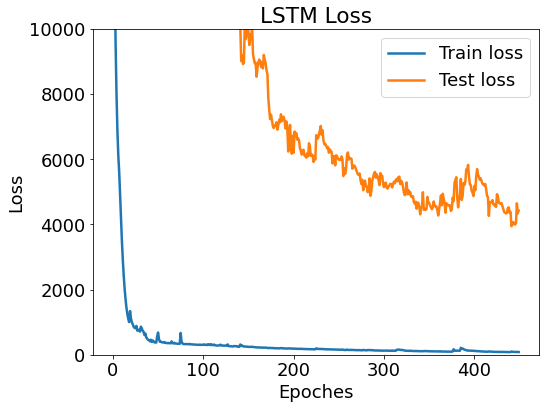

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-11
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-11/lstm_30_0.001_4000_0.9.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


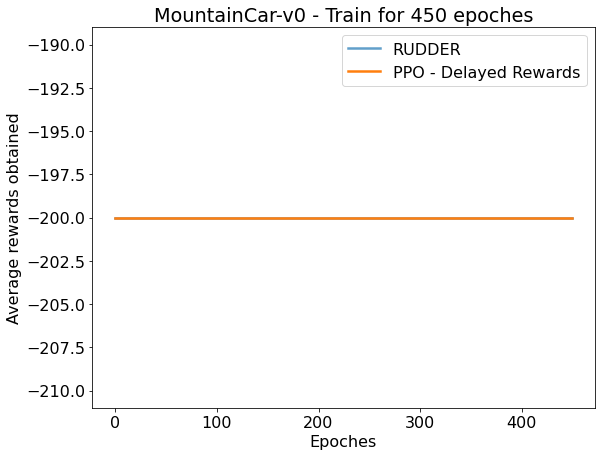



:::: (12/10) Start experiment 22 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-12
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-12
                     spec_idx : 12
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 40
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy

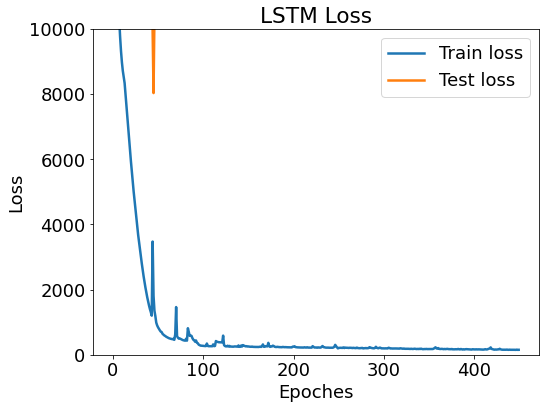

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-12
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-12/lstm_40_0.001_4000_0.9.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


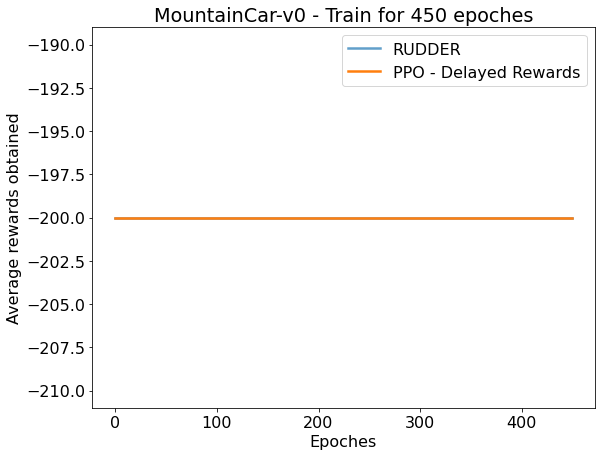



:::: (13/10) Start experiment 23 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-13
                is_batch_spec : True
                    batch_tag : T1MC-S
                    batch_dir : batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-13
                     spec_idx : 13
               steps_by_epoch : 600
                    n_epoches : 450
           rudder_hidden_size : 20
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy

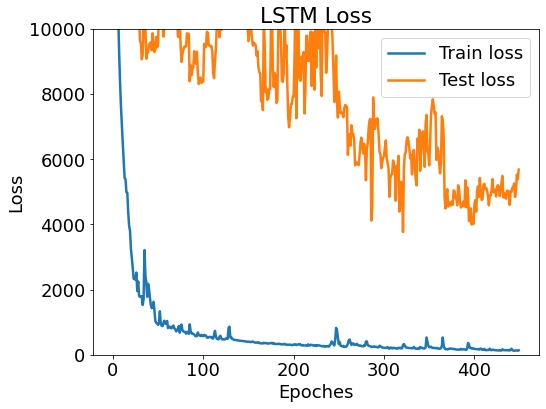

lstm saved in experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-13
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-13/lstm_20_0.001_4000_0.6.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


KeyboardInterrupt: ignored

In [ ]:

result = execute_parameter_search(T1Bravo_MC_colab_ppo_rudder_top_to_bottom_specs,
                                  script_fct=script_rudder_run_ppo_with_rudder_TOP_TO_BOTTOM_main,
                                  exp_size=10, start_count_at=11)

In [ ]:
!git add experiment/run/CartPole-v1/\*/\*
!git add experiment/run/CartPole-v1/\*/lstm_\*.pt
!git add experiment/run/CartPole-v1/\*/\*.jpg
!git add experiment/run/MountainCar-v0/\*
!git add experiment/run/MountainCar-v0/\*/lstm_\*.pt
!git add experiment/run/MountainCar-v0/\*/\*.jpg

!git commit -am "Colab run RedLeader962 T1Bravo run"
!git push https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git --all

fatal: pathspec 'experiment/run/CartPole-v1/*/*' did not match any files
fatal: pathspec 'experiment/run/CartPole-v1/*/lstm_*.pt' did not match any files
fatal: pathspec 'experiment/run/CartPole-v1/*/*.jpg' did not match any files
[T13PRO-159-experimentation-branch d6a43b3] Colab run RedLeader962 T1Bravo run
 8 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-11/MountainCar-v0_PPO_RUDDER.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-11/lstm_30_0.001_4000_0.9.pt
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-11/lstm_fig_loss_30_0.001_4000_0.9.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-S-9h19--3-5-2021--216784955415004323336855774500279287810/run-12/MountainCar-v0_PPO_RUDDER.jpg
 create mode 1

---
# Exp T1Bravo_CP | CartPole

#### T1Bravo_CP | Run partie 2.a



:::: (1/10) Start experiment 1 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-1
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-1
                     spec_idx : 1
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

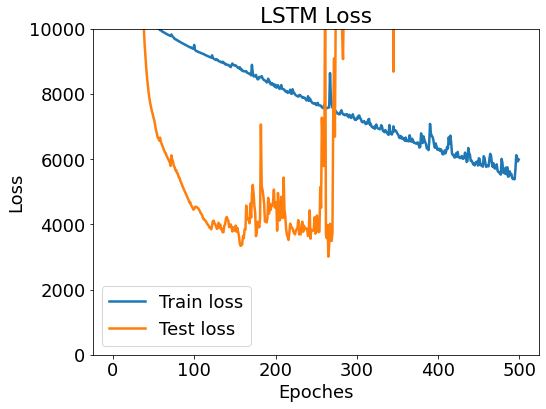

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-1
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-1/lstm_30_0.001_2800_0.3.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


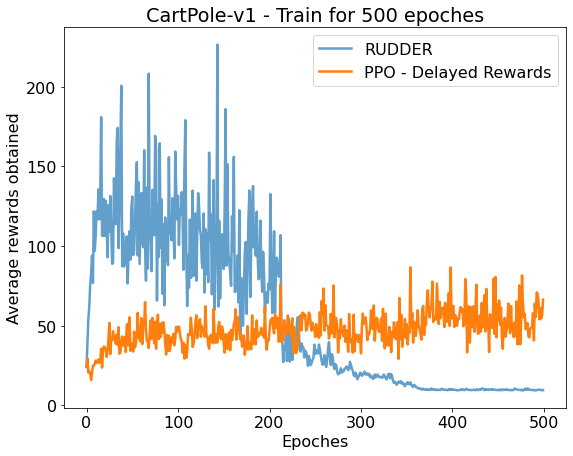



:::: (2/10) Start experiment 2 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-2
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-2
                     spec_idx : 2
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

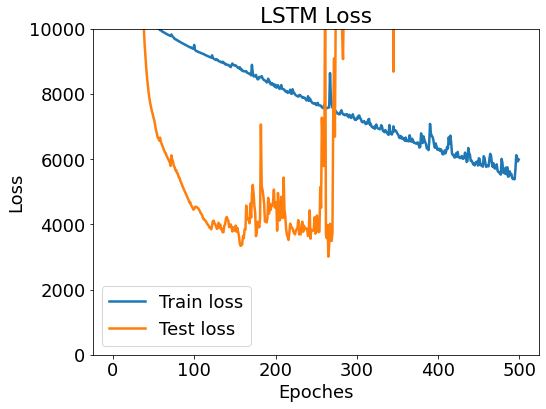

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-2
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-2/lstm_30_0.001_2800_0.3.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


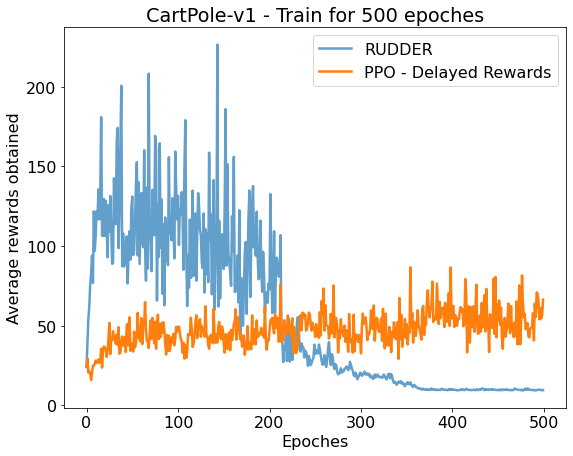



:::: (3/10) Start experiment 3 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-3
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-3
                     spec_idx : 3
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

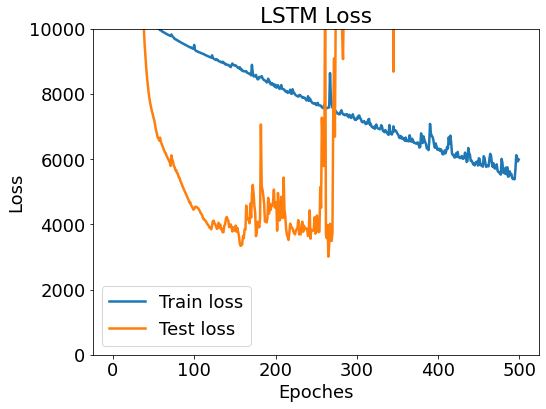

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-3
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-3/lstm_30_0.001_2800_0.3.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


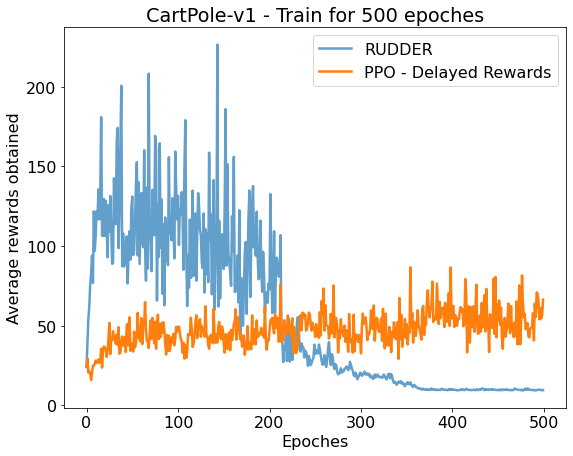



:::: (4/10) Start experiment 4 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-4
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-4
                     spec_idx : 4
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 35
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

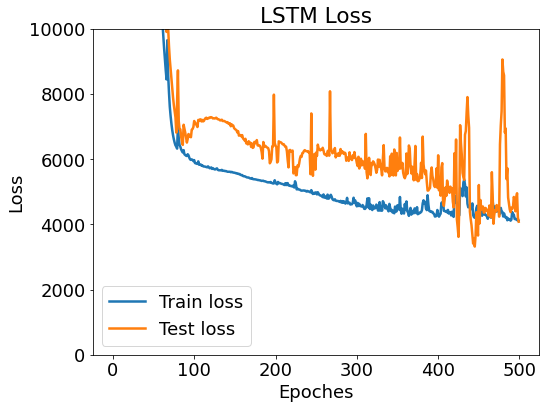

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-4
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-4/lstm_35_0.001_2800_0.3.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


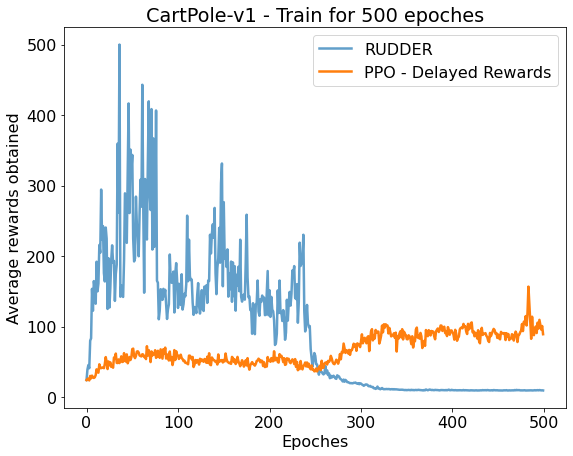



:::: (5/10) Start experiment 5 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-5
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-5
                     spec_idx : 5
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 35
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

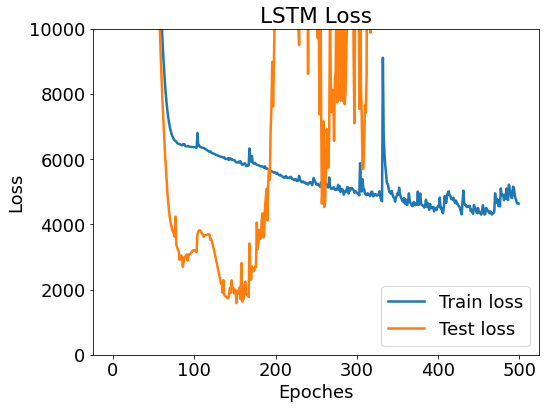

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-5
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-5/lstm_35_0.001_2800_0.4.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


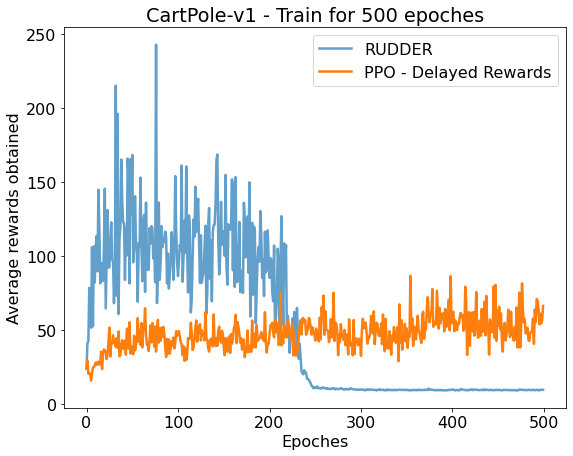



:::: (6/10) Start experiment 6 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-6
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-6
                     spec_idx : 6
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 30
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

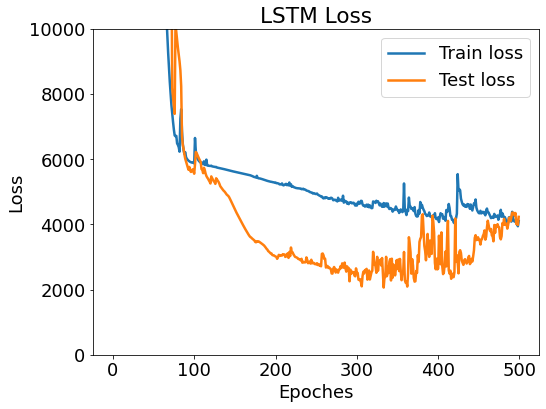

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-6
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-6/lstm_30_0.001_2800_0.5.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


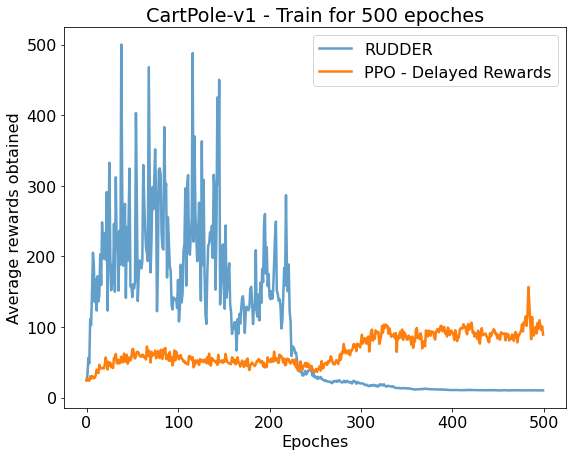



:::: (7/10) Start experiment 7 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-7
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-7
                     spec_idx : 7
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 25
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

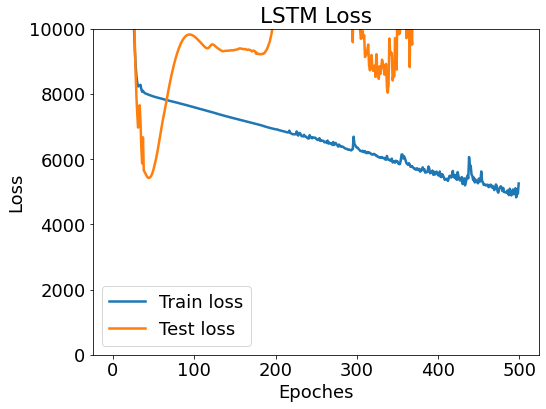

lstm saved in experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-8
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.
Network experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-8/lstm_40_0.001_2800_0.7.pt loaded from source file lstm
Watch out ! Delayed rewards set in parameters ! Change to False if not wanted.


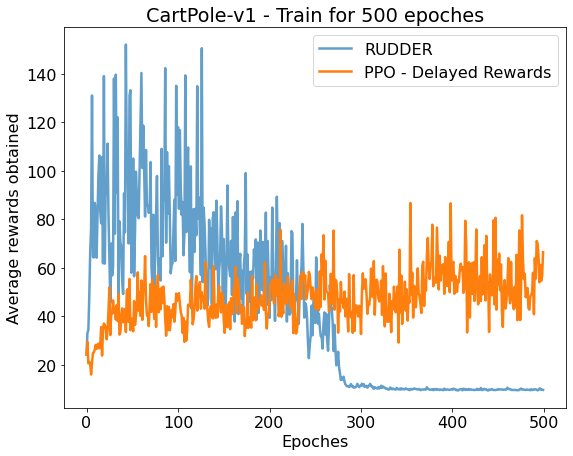



:::: (9/10) Start experiment 9 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : Configuration excel 1.e - revision F-A
                     env_name : CartPole-v1
                    show_plot : True
              print_to_consol : False
                         seed : 53
               experiment_dir : run-9
                is_batch_spec : True
                    batch_tag : T1CP-S
                    batch_dir : batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/CartPole-v1/batch-T1CP-S-12h11--3-5-2021--219282878828347791815916075407598419970/run-9
                     spec_idx : 9
               steps_by_epoch : 1000
                    n_epoches : 500
           rudder_hidden_size : 25
                   hidden_dim : 18
              n_hidden_layers : 1
      n_trajectory_per_policy : 1
 

In [ ]:
result = execute_parameter_search(T1Bravo_CP_colab_ppo_rudder_top_to_bottom_specs,
                                  script_fct=script_rudder_run_ppo_with_rudder_TOP_TO_BOTTOM_main,
                                  exp_size=10, start_count_at=1)

In [1]:
!git add experiment/run/CartPole-v1/\*/\*
!git add experiment/run/CartPole-v1/\*/lstm_\*.pt
!git add experiment/run/CartPole-v1/\*/\*.jpg
!git add experiment/run/MountainCar-v0/\*
!git add experiment/run/MountainCar-v0/\*/lstm_\*.pt
!git add experiment/run/MountainCar-v0/\*/\*.jpg

!git commit -am "Colab run RedLeader962 T1Bravo run"
!git push https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git --all

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


#### T1Bravo_CP | Run partie 2.b

In [ ]:
result = execute_parameter_search(T1Bravo_CP_colab_ppo_rudder_top_to_bottom_specs,
                                  script_fct=script_rudder_run_ppo_with_rudder_TOP_TO_BOTTOM_main,
                                  exp_size=10, start_count_at=11)

In [ ]:
!git add experiment/run/CartPole-v1/\*/\*
!git add experiment/run/CartPole-v1/\*/lstm_\*.pt
!git add experiment/run/CartPole-v1/\*/\*.jpg
!git add experiment/run/MountainCar-v0/\*
!git add experiment/run/MountainCar-v0/\*/lstm_\*.pt
!git add experiment/run/MountainCar-v0/\*/\*.jpg

!git commit -am "Colab run RedLeader962 T1Bravo run"
!git push https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git --all